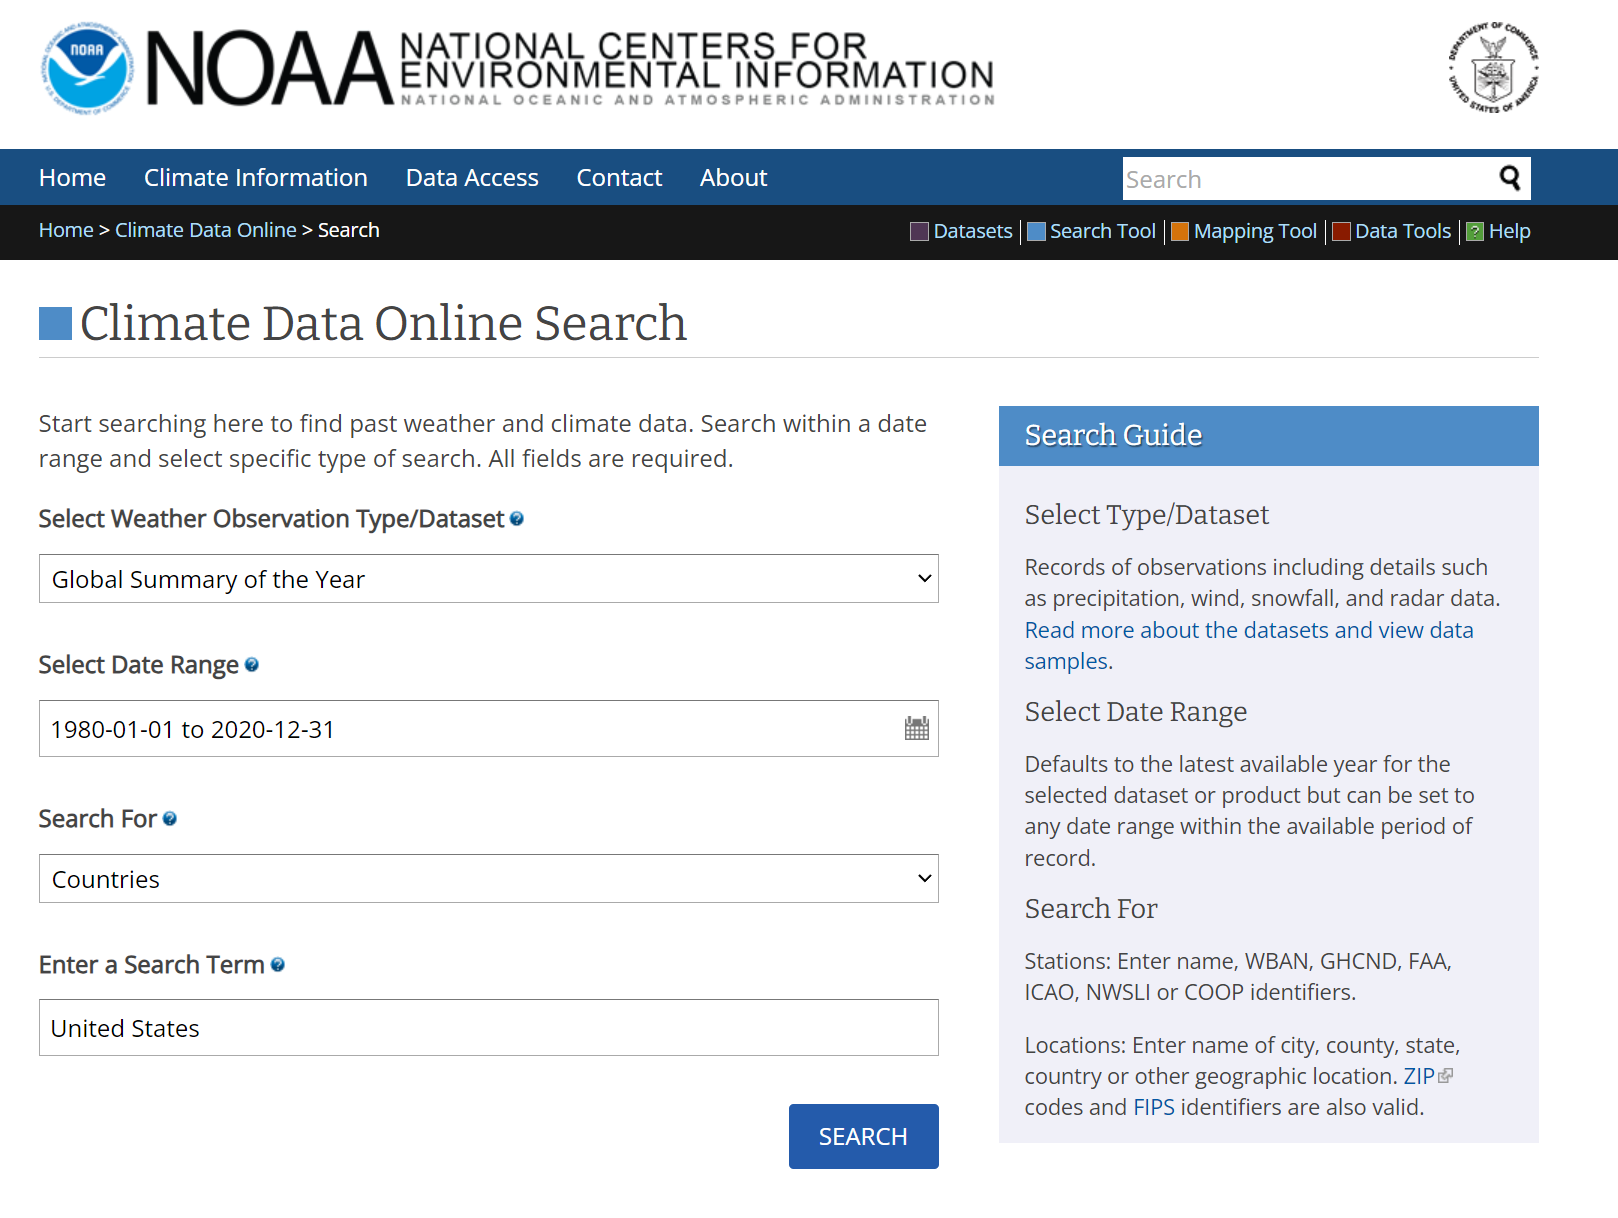
As you can see im going to be using a bunch of data from the website we found earlier, and the conclusion im going to try to make is that the world on average has been geting warmer.
maby then i can proove to my aunt that global warming is real!

oh ok well it wouldnt let me download as much data as i wanted so i found another website:

https://asmith.ucdavis.edu/data/prism-weather

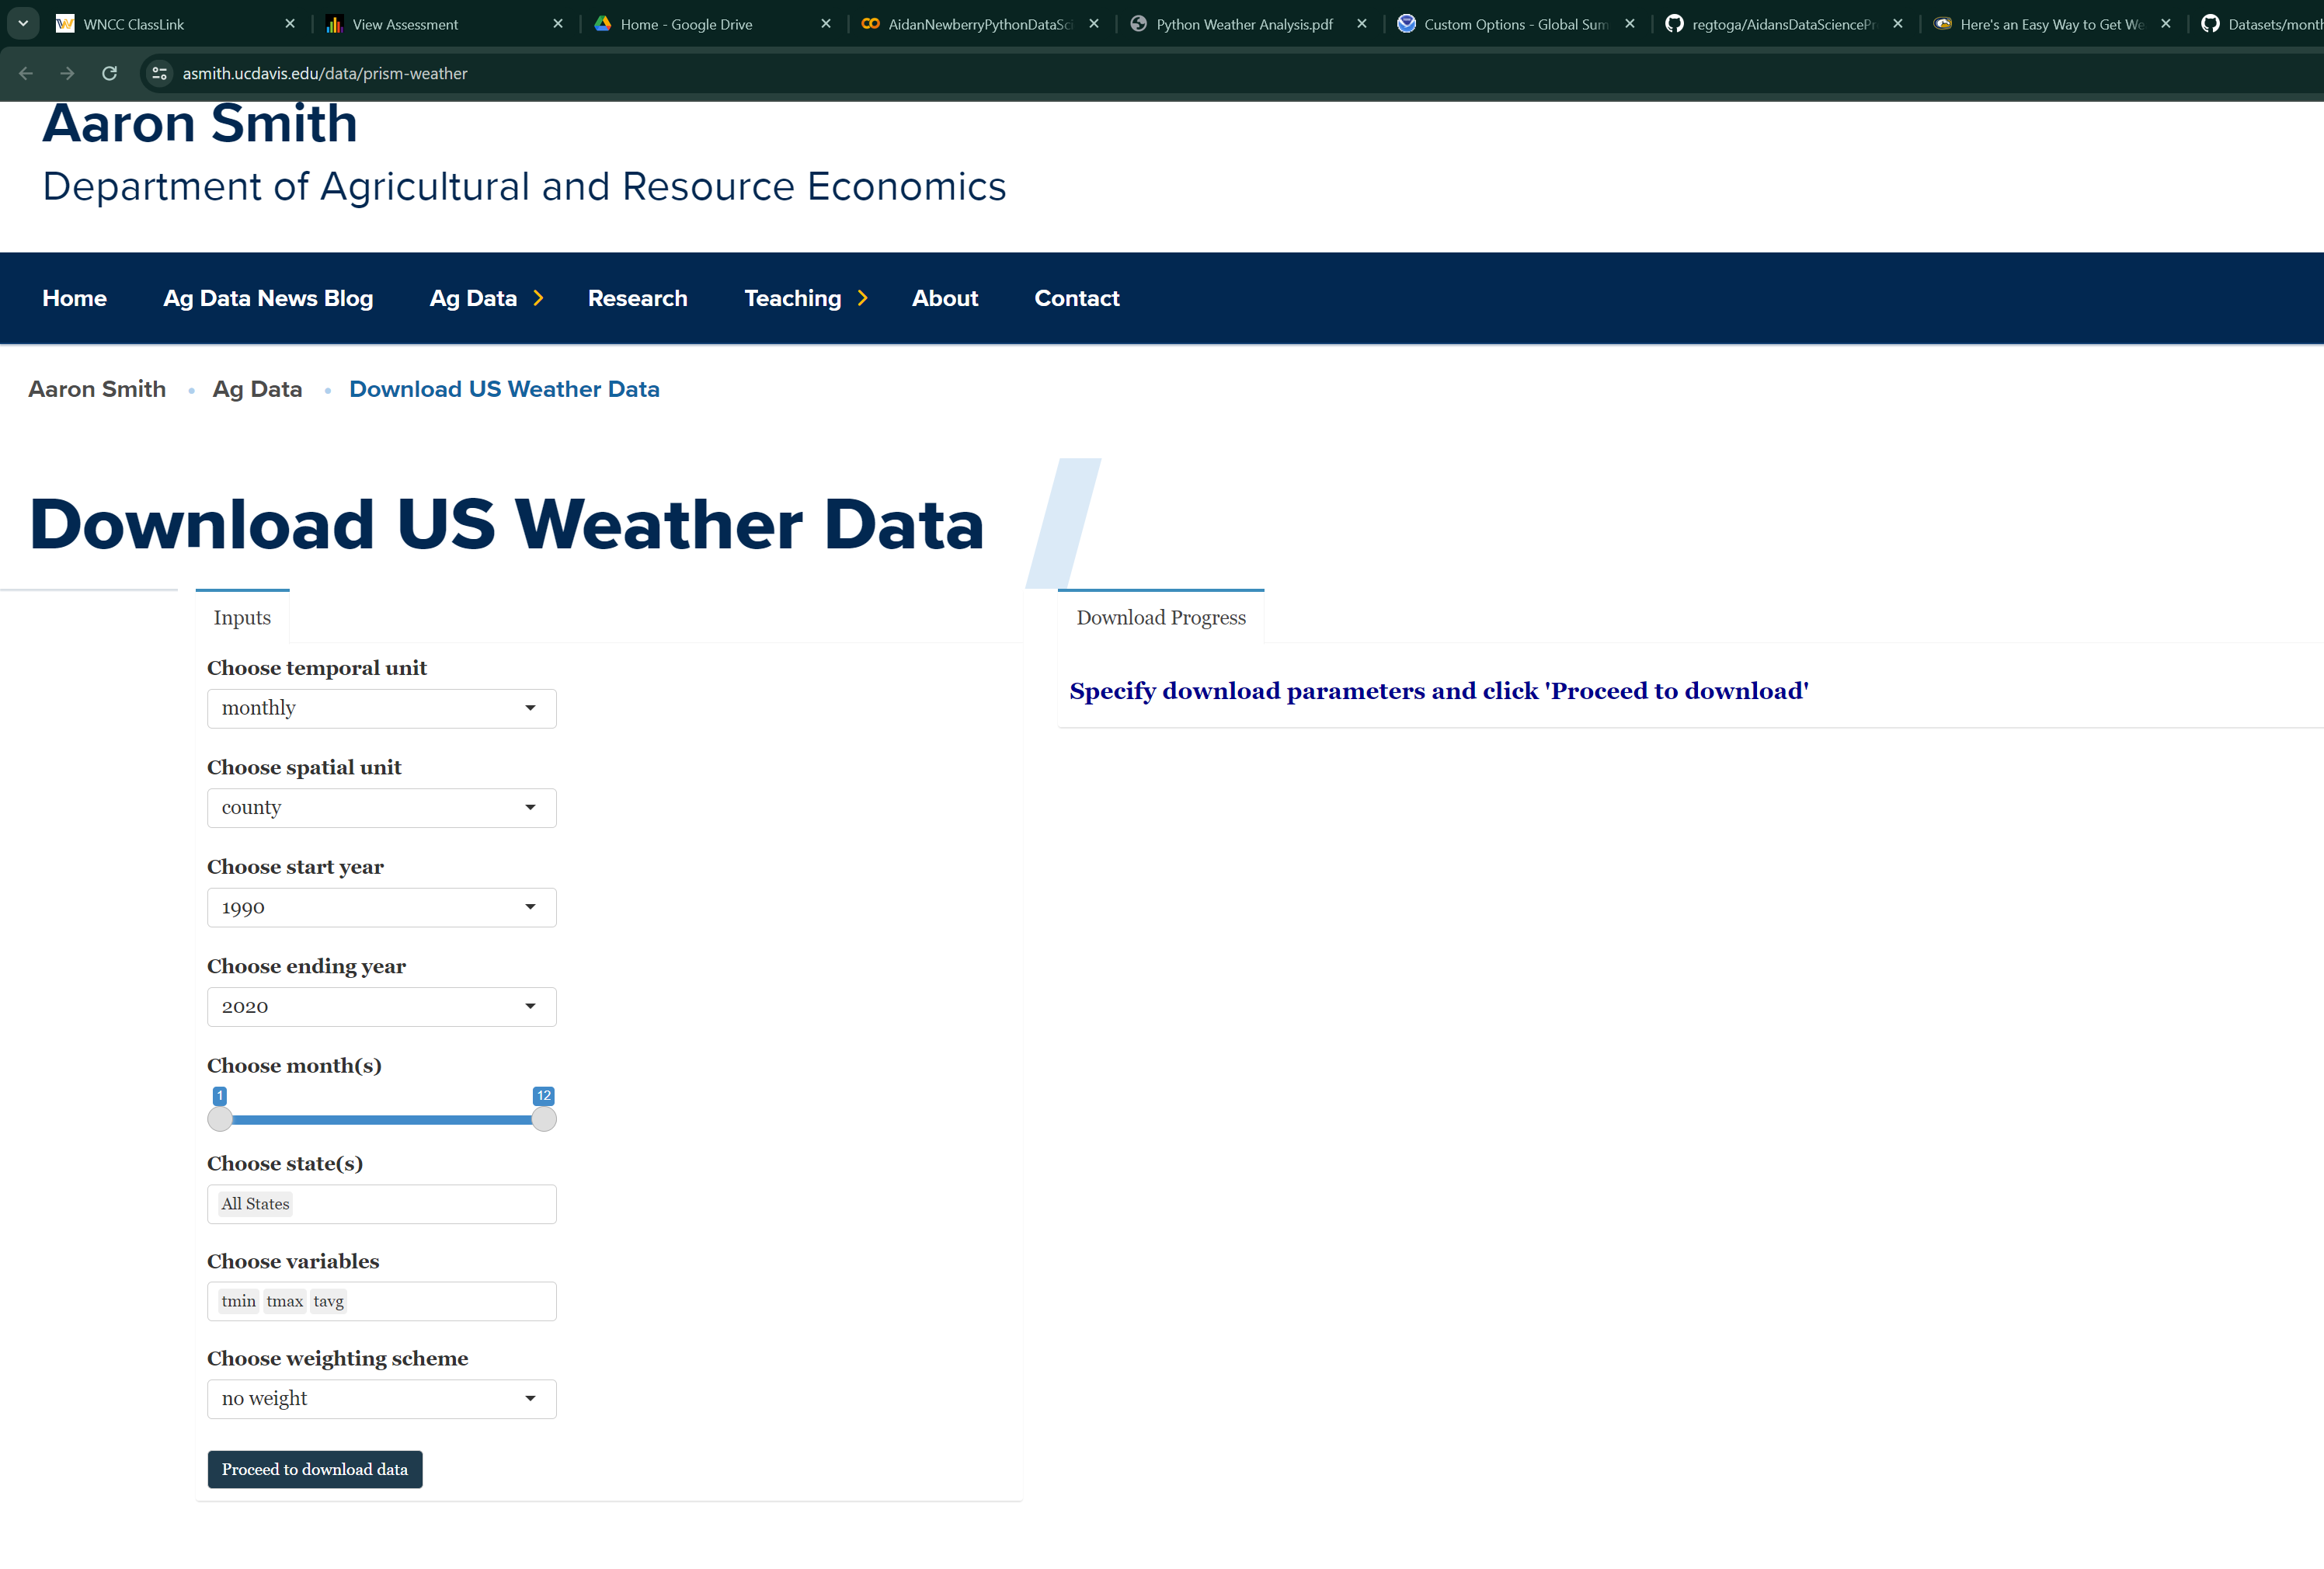


i also found another jankey way to get data so that is here:
https://github.com/jbrownlee/Datasets/blob/master/monthly-mean-temp.csv

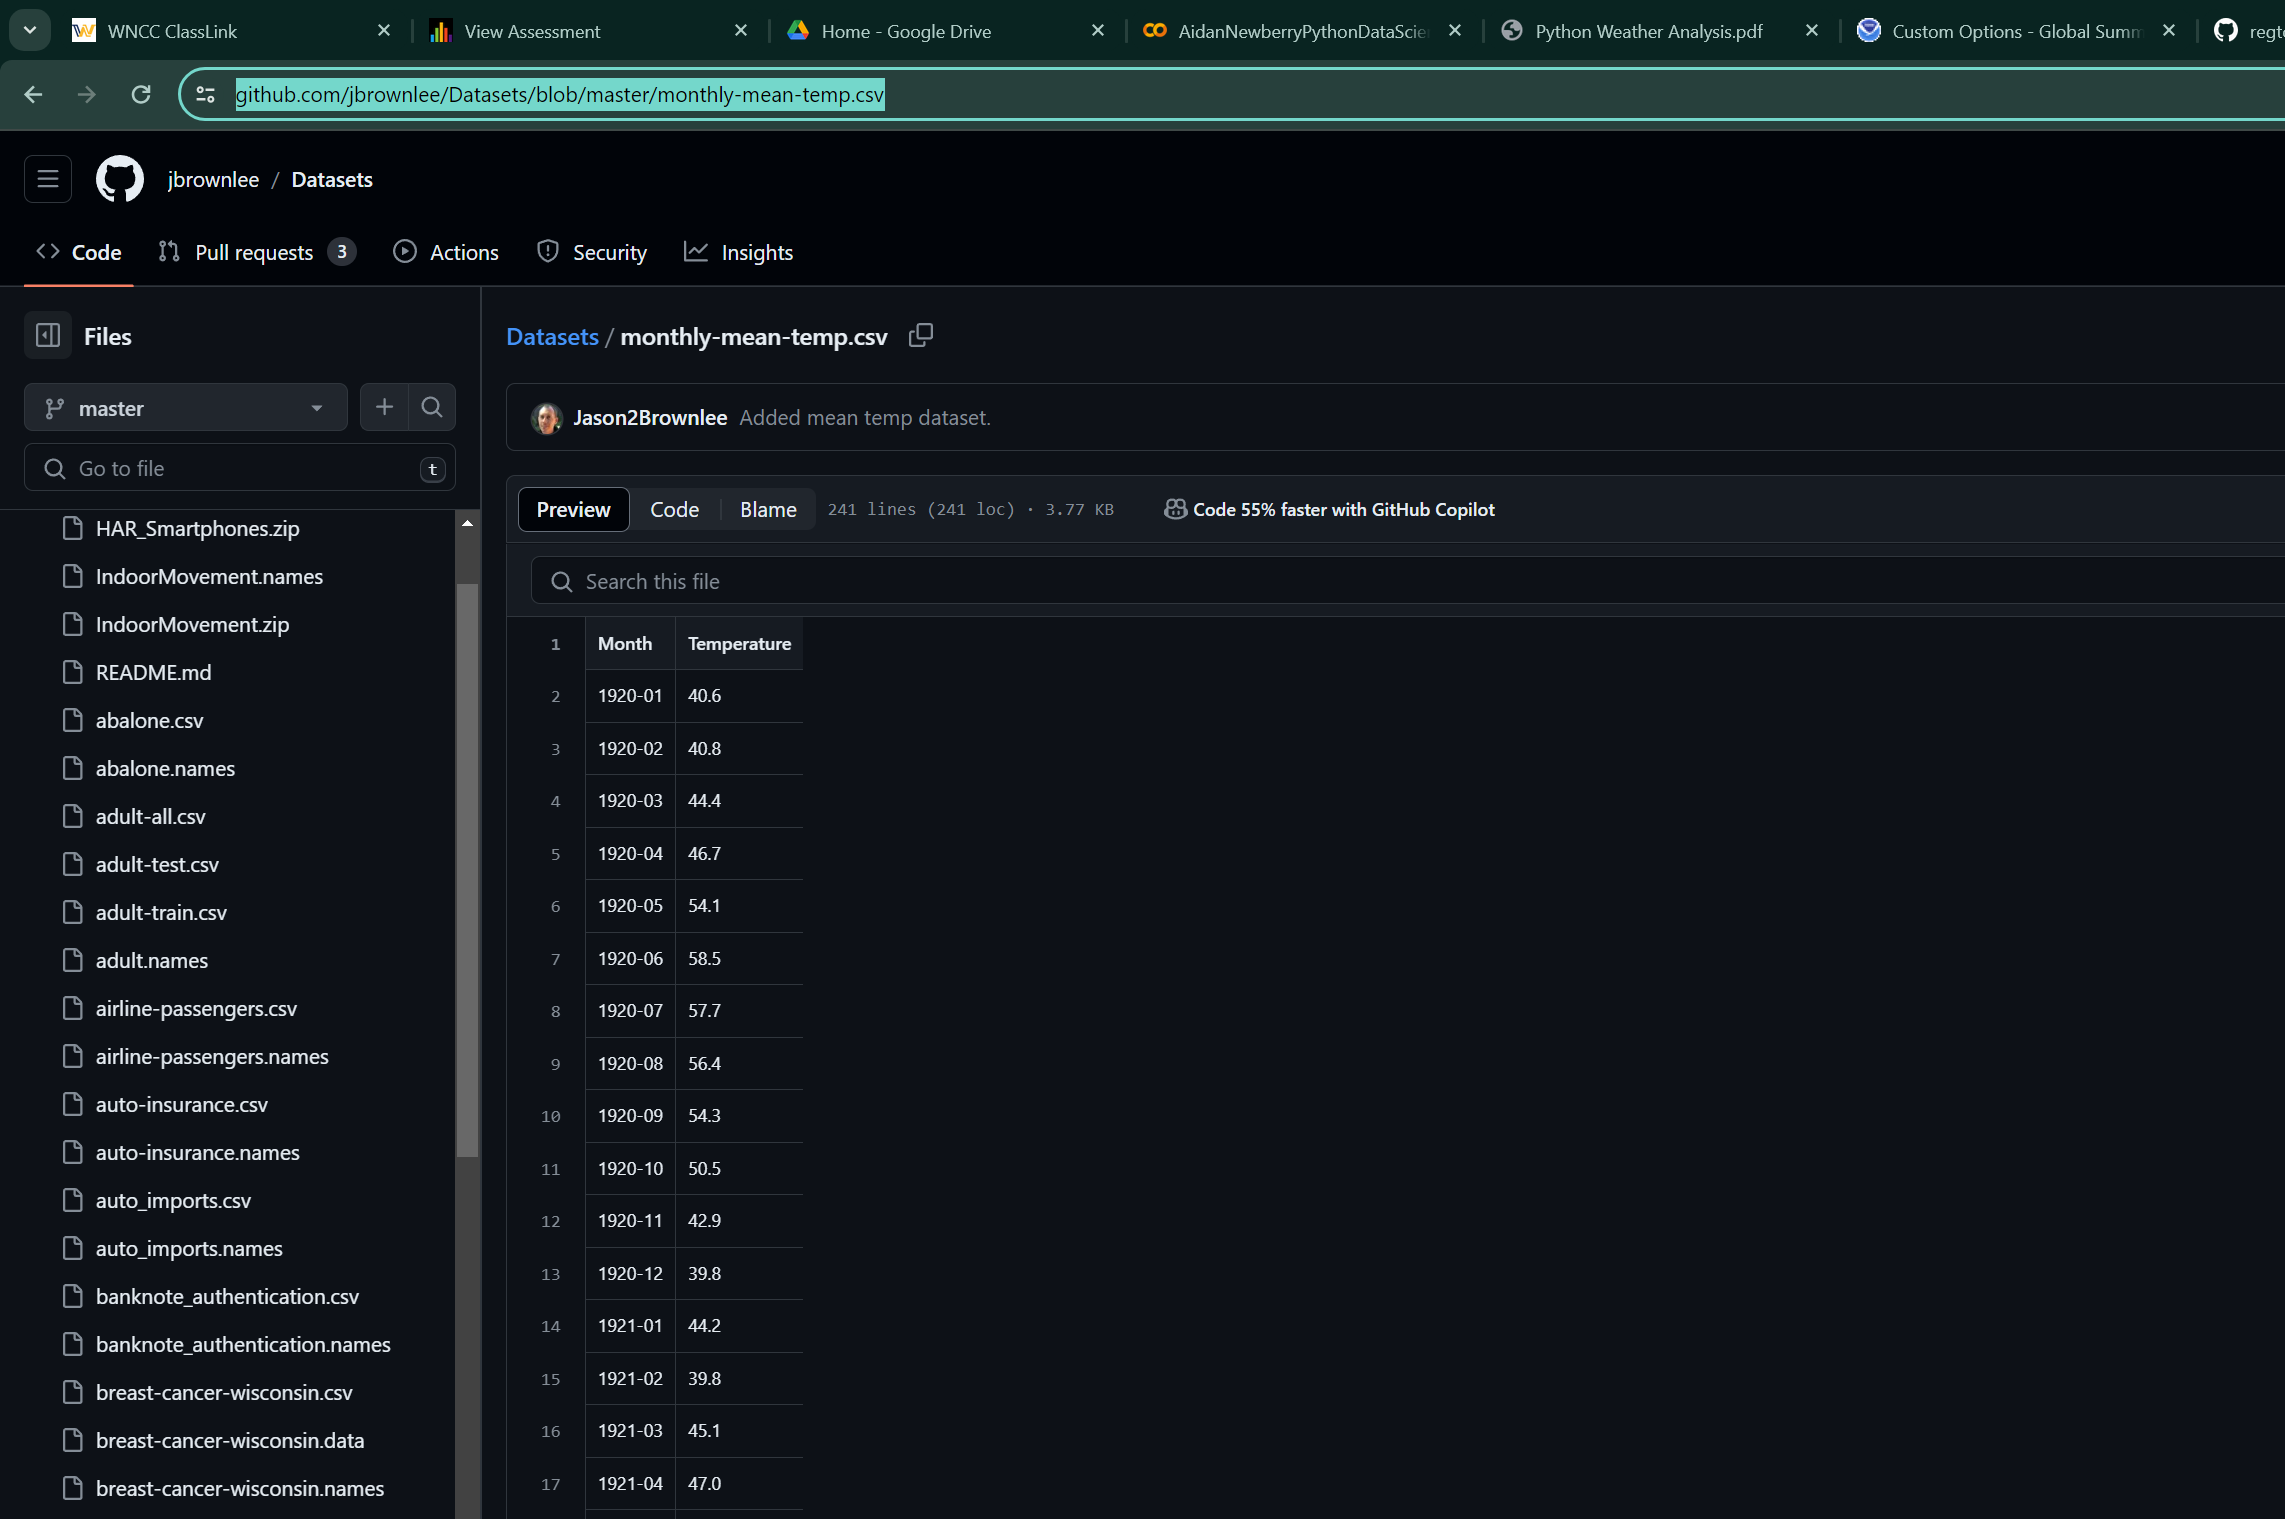

The first thing im going to try and do is the same thing we did last time with the Scottsbluff weather project and just chart the data.

  st_abb  st_code county_name  fips      ym   tmin    tmax    tavg
0     AL        1     Autauga  1001  199001  4.060  16.456  10.258
1     AL        1     Baldwin  1003  199001  5.874  18.067  11.970
2     AL        1     Barbour  1005  199001  4.472  17.514  10.993
3     AL        1        Bibb  1007  199001  3.019  15.577   9.298
4     AL        1      Blount  1009  199001  1.903  13.999   7.951
        st_abb  st_code county_name   fips      ym    tmin   tmax   tavg
1155799     WY       56  Sweetwater  56037  202012 -12.858  0.064 -6.397
1155800     WY       56       Teton  56039  202012 -14.821 -2.804 -8.812
1155801     WY       56       Uinta  56041  202012 -12.571  1.670 -5.450
1155802     WY       56    Washakie  56043  202012  -9.666  3.579 -3.044
1155803     WY       56      Weston  56045  202012  -7.893  4.872 -1.510


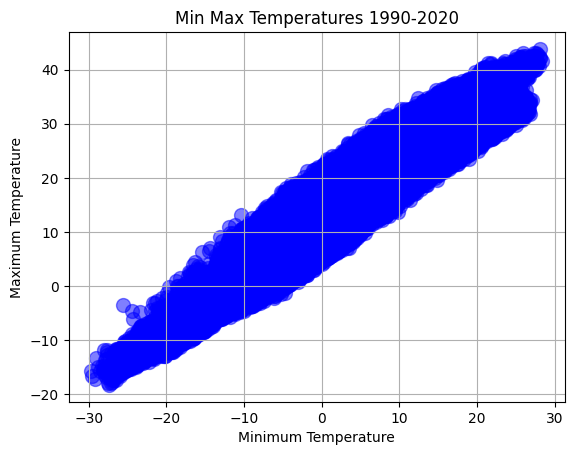

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#Read the data from the CSV file "3671811.csv" into a Dataframe named "weather"
weather = pd.read_csv(
    "https://raw.githubusercontent.com/regtoga/AidansDataScienceProject/main/Data/MontlyTemperaturesInUSA.csv"
)

#Display the first and last few rows of the DataFrame "noaa".
#This gives you an idea about the types of data
print(weather.head())
print(weather.tail())

#Extract the 'TMAX' and 'TMIN' colums from the DataFrame "noaa"
#assign to variables
temp_max = weather['tmax']
temp_min = weather['tmin']

#Create a scatter plot with "temp_min" as the x-values,
#"temp_max" as the y-valuesl, marker size of 100,
#filled markers in blue color with transparency set to 0.5.
plt.scatter(temp_min, temp_max, s=100, c="blue", alpha=0.5)

#Display the grid on the plot
plt.grid(True)

#Set the title of the plot to "Min Max Temperatures Jan-Mar 2024".
plt.title("Min Max Temperatures 1990-2020")

#Set the label for the x-axis as "Minimum Temperature"
plt.xlabel("Minimum Temperature")

#Set the label for the y-axis as "Maximum Temperature".
plt.ylabel("Maximum Temperature")

#Display the plot.
plt.show()

Wow that turned out pretty good, the only thing i have to do now is make it into a line chart and i might be able to see the averate temperature over time

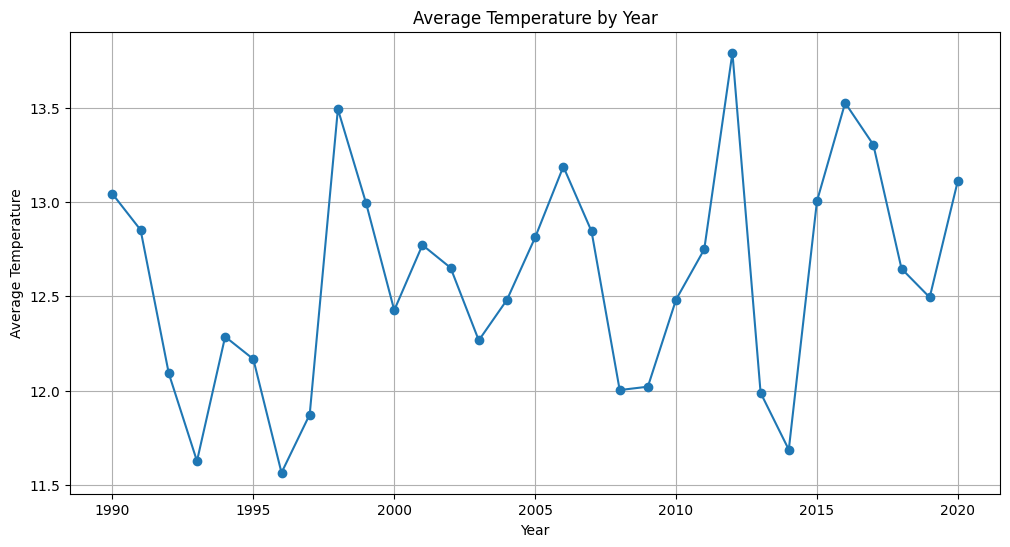

In [10]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#Read the data from the CSV file into a DataFrame
weather = pd.read_csv("https://raw.githubusercontent.com/regtoga/AidansDataScienceProject/main/Data/MontlyTemperaturesInUSA.csv")

#Convert the 'ym' column to a datetime format
weather['ym'] = pd.to_datetime(weather['ym'], format='%Y%m')

#Extract the year from the datetime column
weather['year'] = weather['ym'].dt.year

#Group the data by year and calculate the average temperature for each year
avg_temp_yearly = weather.groupby('year')['tavg'].mean()

#Plot the data
plt.figure(figsize=(12, 6))
plt.plot(avg_temp_yearly.index, avg_temp_yearly.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Year')
plt.grid(True)
plt.show()


I really thought i would see more of something here if i did this, just from that single result i now respect datascientists a lot more.

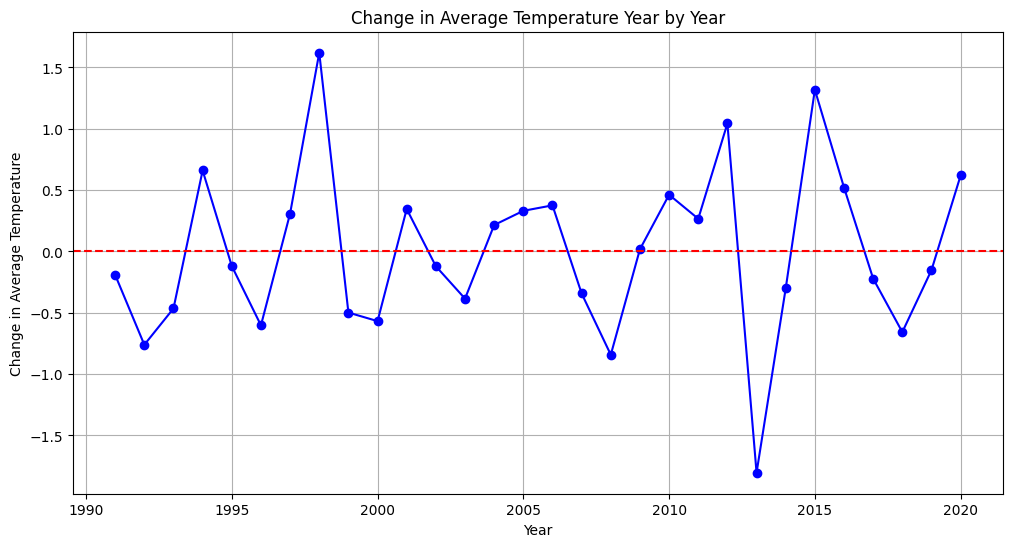

In [11]:
# Calculate the difference in average temperature between consecutive years
avg_temp_yearly_diff = avg_temp_yearly.diff()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(avg_temp_yearly_diff.index, avg_temp_yearly_diff.values, marker='o', color='b')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Year')
plt.ylabel('Change in Average Temperature')
plt.title('Change in Average Temperature Year by Year')
plt.grid(True)
plt.show()


This graph i think shows the deviation from year to year in temperatures, i dont quite understand what im looking at but what i do know is that it doesnt look like any appretiable amount of globla warming! 

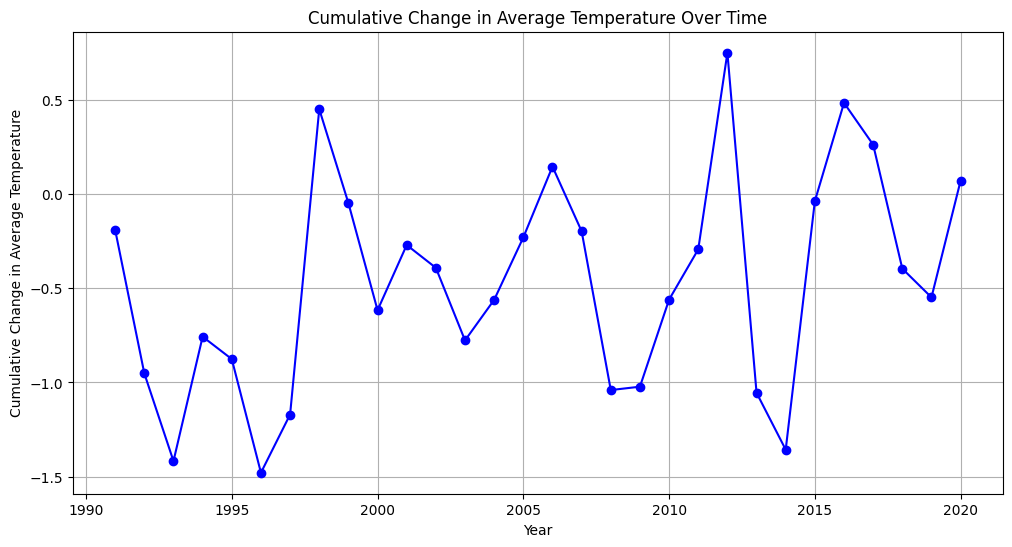

Final Cumulative Change: 0.07 degrees


In [12]:
# Calculate the cumulative sum of the differences in average temperature
cumulative_temp_diff = avg_temp_yearly_diff.cumsum()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(cumulative_temp_diff.index, cumulative_temp_diff.values, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Cumulative Change in Average Temperature')
plt.title('Cumulative Change in Average Temperature Over Time')
plt.grid(True)
plt.show()

# Print the final cumulative change
final_change = cumulative_temp_diff.iloc[-1]
print(f"Final Cumulative Change: {final_change:.2f} degrees")


honestly i dont know where to go from here, I dont know if its my dataset or if its my method of graphing. but from what i understood from my calculation of cumulative change in my graph says its only up .07 degrees from normal? something is definatly wrong...


Starting Finals week i really want something to work.. i found a nasa website: https://data.giss.nasa.gov/gistemp/
that has a lot of weather data but i cant figure out how to download any of it. they have a really fancy graph that i think could be why my graph doesnt work, i need to graph seasonal data:
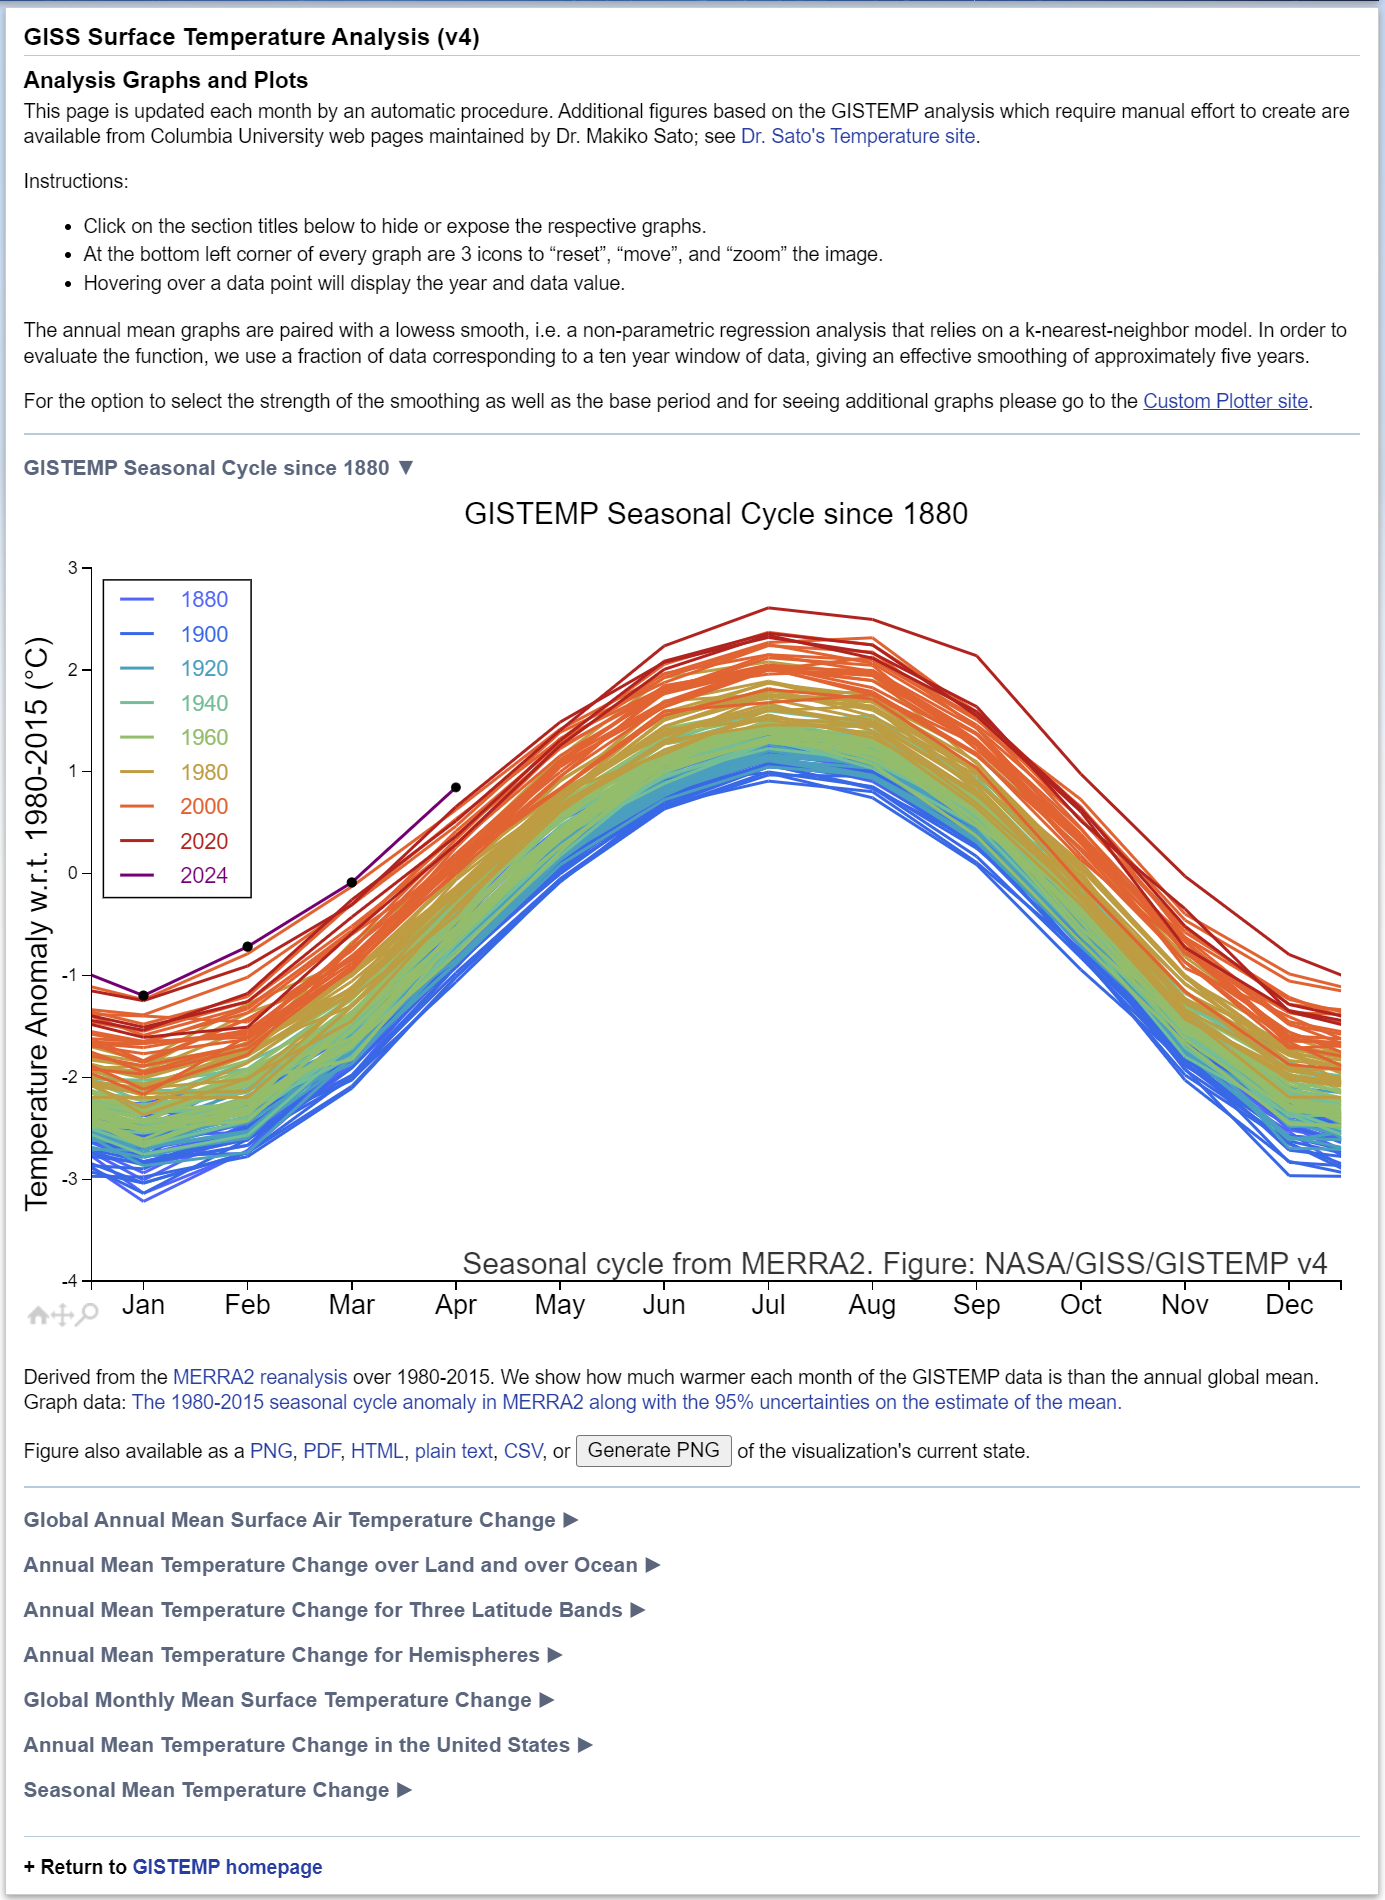

So what i will do now is try and recreate that graph using my own dataset...

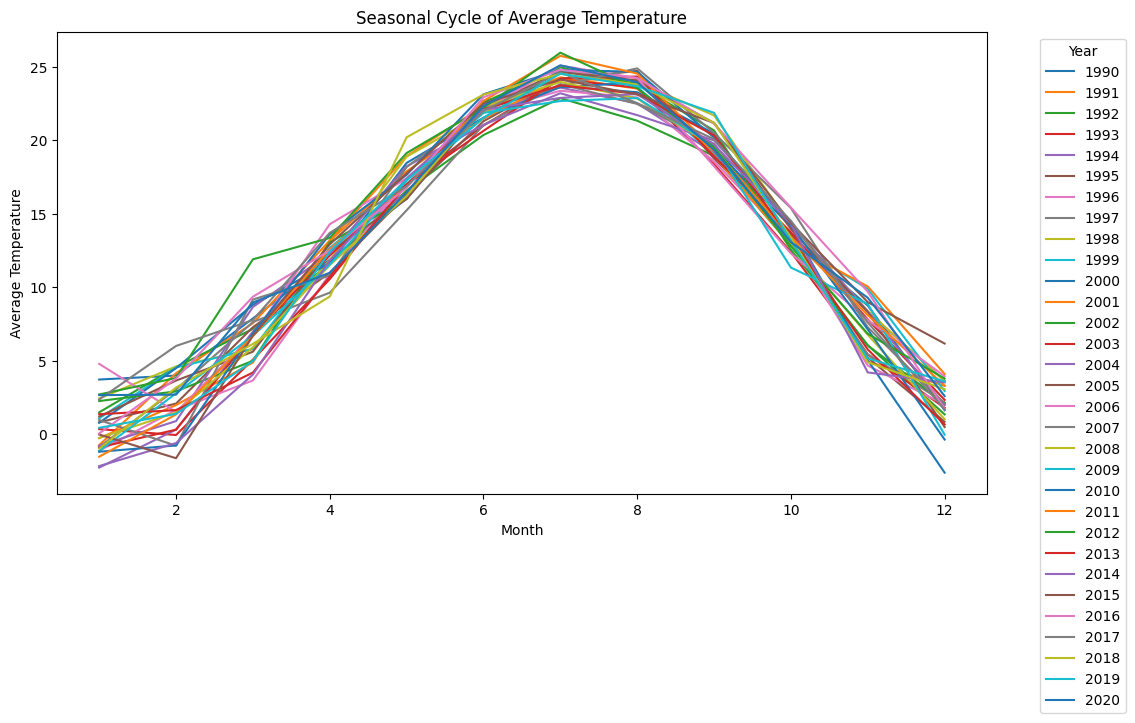

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file into a DataFrame
weather = pd.read_csv("https://raw.githubusercontent.com/regtoga/AidansDataScienceProject/main/Data/MontlyTemperaturesInUSA.csv")

# Convert the 'ym' column to a datetime format
weather['ym'] = pd.to_datetime(weather['ym'], format='%Y%m')

# Extract the year from the datetime column
weather['year'] = weather['ym'].dt.year

# Group the data by year and month, and calculate the average temperature for each month within a year
avg_temp_monthly = weather.groupby(['year', 'ym'])['tavg'].mean().reset_index()

# Extract the month from the datetime column
avg_temp_monthly['month'] = avg_temp_monthly['ym'].dt.month

# Plot the data
plt.figure(figsize=(12, 6))
for year in avg_temp_monthly['year'].unique():
    data = avg_temp_monthly[avg_temp_monthly['year'] == year]
    plt.plot(data['month'], data['tavg'], label=year)

plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Seasonal Cycle of Average Temperature')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')


ok well this first version does not help me much because i need to make the color scheme make since, the nasa one starts with cold colors and goes to warm colors over the years and thats because the graph had a trend of getting hotter over time
so it made since. im going to try and make my colors make since next:

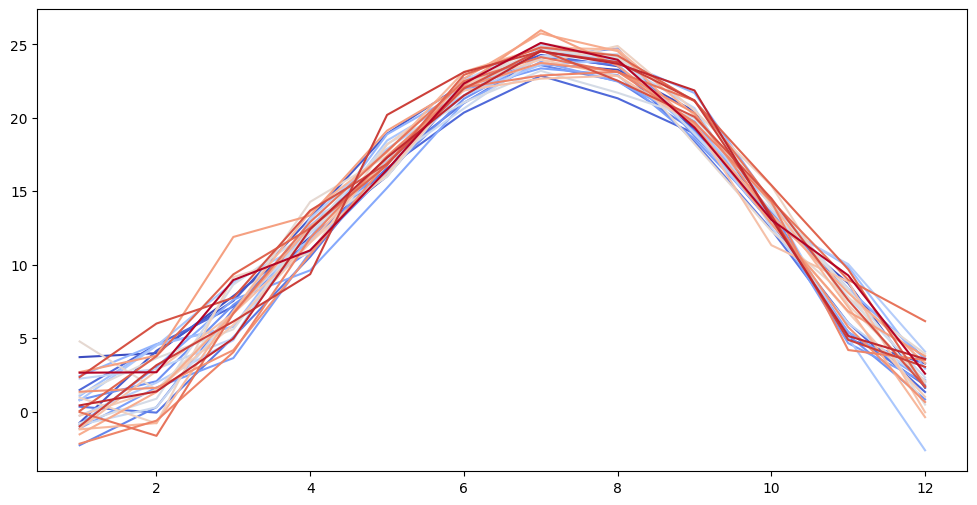

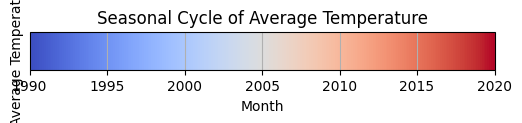

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Normalize the years to be between 0 and 1
norm = Normalize(vmin=avg_temp_monthly['year'].min(), vmax=avg_temp_monthly['year'].max())

# Choose a cool-to-warm colormap
cmap = plt.get_cmap('coolwarm')

# Create a ScalarMappable to map normalized year values to colors
sm = ScalarMappable(norm=norm, cmap=cmap)

# Plot the data
plt.figure(figsize=(12, 6))
for year in avg_temp_monthly['year'].unique():
    data = avg_temp_monthly[avg_temp_monthly['year'] == year]
    color = sm.to_rgba(year)  # Get color for the year
    plt.plot(data['month'], data['tavg'], color=color)

# Add colorbar
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cbar = fig.colorbar(sm, cax=ax, orientation='horizontal')
cbar.set_label('Year')

plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Seasonal Cycle of Average Temperature')
plt.grid(True)
plt.show()


Even with my imitation graph of the nasa one i cant make since of the data, i would say its really evenly spread out allong the same line? I dont want to end my project like this but I really cant think of any other reason that there isnt any warming or cooling coming out of my graphs.